In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
df_exp= pd.read_csv("df_exp.csv")

In [3]:
y=pd.read_csv("y.csv")

In [4]:
df_exp["label"]=y.astype(int)

In [5]:
df_exp

,_id,Title,Company,Location,Salary,Description,Date,Job_Search,Department_Search,clean_title,...,Docker,ABAP,WLang,city,cp,salary_min,salary_max,salary_period,salary_mean,label
0,p_008d77a008590232,INGÉNIEUR DÉVELOPPEUR C++ / JAVA F/H,ALTEN,Toulouse (31),30 000 € - 45 000 € par an,Partenaire technologique de référence des plus...,08/09/2019,Développeur,Haute-Garonne,ingénieur développeur java,...,0,0,0,Toulouse,31,30000.0,45000.0,year,37500.0,3.0
1,p_00f2ad8db3c30b8e,Devops F/H,Kent FR,Bordeaux (33),35 000 € - 40 000 € par an,"KENT, marque de GroupAgora dédiée aux recrutem...",09/03/2019,Développeur,Gironde,devops,...,1,0,0,Bordeaux,33,35000.0,40000.0,year,37500.0,1.0
2,p_00fa03a21ad52a71,Data Scientist H/F,QYSY,Paris (75),40 000 € - 65 000 € par an,QYSY est un cabinet de conseil et de recruteme...,29/09/2019,Data,75,data scientist,...,0,0,0,Paris,75,40000.0,65000.0,year,52500.0,3.0
3,p_0130bef769eef3cc,BUSINESS DEVELOPER BTOB - DATA INTELLIGENCE (H/F),L.I.P,Lyon 3e (69),35 000 € - 60 000 € par an,69003 - Lyon-3e-Arrondissement CDI Bac+5 et pl...,07/10/2019,Data,Rhône,business developer btob data intelligence,...,0,0,0,Lyon,69,35000.0,60000.0,year,47500.0,1.0
4,p_019d01b7494dc632,Référent fonctionnel et données - Data manager...,GARCIN FINANCES ET PARTICIPATIONS,Corbas (69),40 000 € - 45 000 € par an,Vous souhaitez participer à la structuration d...,10/09/2019,Data,Rhône,référent fonctionnel données data manager,...,0,0,0,Corbas,69,40000.0,45000.0,year,42500.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,pj_edab0aa260675678,Centre-ville / Client final / Développeur Full...,Delia Technologies,Nantes (44),37 000 € - 40 000 € par an,Delia Technologies #LaDevOpsFamily Delia Techn...,04/10/2019,Développeur,Loire-Atlantique,client final développeur java js,...,0,0,0,Nantes,44,37000.0,40000.0,year,38500.0,3.0
421,pj_f1d346fc78673d6a,Développeur PHP & Intégrateur HTML5/CSS3,Éraclès,Paris 15e (75),30 000 € - 37 000 € par an,Description du poste Éraclès est une agence di...,NaN,Développeur,75,développeur php intégrateur,...,0,0,0,Paris,75,30000.0,37000.0,year,33500.0,0.0
422,pj_f7e3c209ffdd7369,JURISTE SENIOR EN DATA PRIVACY H/F,ADECCO,Villeurbanne (69),50 € par heure,The Adecco Group est le leader mondial des sol...,NaN,Data,Rhône,juriste senior data privacy,...,0,0,0,Villeurbanne,69,1750.0,1750.0,week,1750.0,3.0
423,pj_fd8e78ca8bedfe98,Web Developpeur,CLERE / JES,Loire-Atlantique,22 000 € - 28 000 € par an,"Éditeur de logiciels, nous développons en inte...",NaN,Développeur,Loire-Atlantique,web developpeur,...,0,0,0,Loire-Atlantique,None,22000.0,28000.0,year,25000.0,2.0


In [8]:
label_1 = df_exp[df_exp["label"]==0]
label_2 = df_exp[df_exp["label"]==2]
label_3 = df_exp[df_exp["label"]==3]
label_4 = df_exp[df_exp["label"]==1]

In [9]:
def clean_title(title):
    title = word_tokenize(title)
    #desc = [word.lower() for word in desc if word.isalpha() and len(word)>2]
    title = [word.lower() for word in title if (word.isalpha() or word.isdigit()) and len(word)>2]
    title = [word for word in title if word not in stop_words]
    return title

In [10]:
stop_words = stopwords.words('french')
tag_title_0 = label_1["Title"].apply(clean_title)
tag_title_1 = label_2["Title"].apply(clean_title)    
tag_title_2 = label_3["Title"].apply(clean_title)
tag_title_3 = label_4["Title"].apply(clean_title)

In [11]:
from collections import Counter
result_0 = tag_title_0.apply(Counter).sum().items() # créer un dictionnaire avec la frequence de chaque mot de tag_title1
result_0 = sorted(result_0, key=lambda kv : kv[1], reverse=True) #on va ordonner par la valeur du dictionnaire en ordre descendant

result_1 = tag_title_1.apply(Counter).sum().items()
result_1 = sorted(result_1, key=lambda kv : kv[1], reverse=True)

result_2 = tag_title_2.apply(Counter).sum().items()
result_2 = sorted(result_2, key=lambda kv : kv[1], reverse=True)

result_3 = tag_title_3.apply(Counter).sum().items()
result_3 = sorted(result_3, key=lambda kv : kv[1], reverse=True)

In [12]:
result_series_0 = {k: v for k,v in result_0}
result_series_1 = {k: v for k,v in result_1}
result_series_2 = {k: v for k,v in result_2}
result_series_3 = {k: v for k,v in result_3}

In [13]:
wordcloud_0 = WordCloud().generate_from_frequencies(result_series_0)
wordcloud_1 = WordCloud(max_words=100).generate_from_frequencies(result_series_1)
wordcloud_2 = WordCloud(max_words=100).generate_from_frequencies(result_series_2)
wordcloud_3 = WordCloud(max_words=100).generate_from_frequencies(result_series_3)

(-0.5, 399.5, 199.5, -0.5)

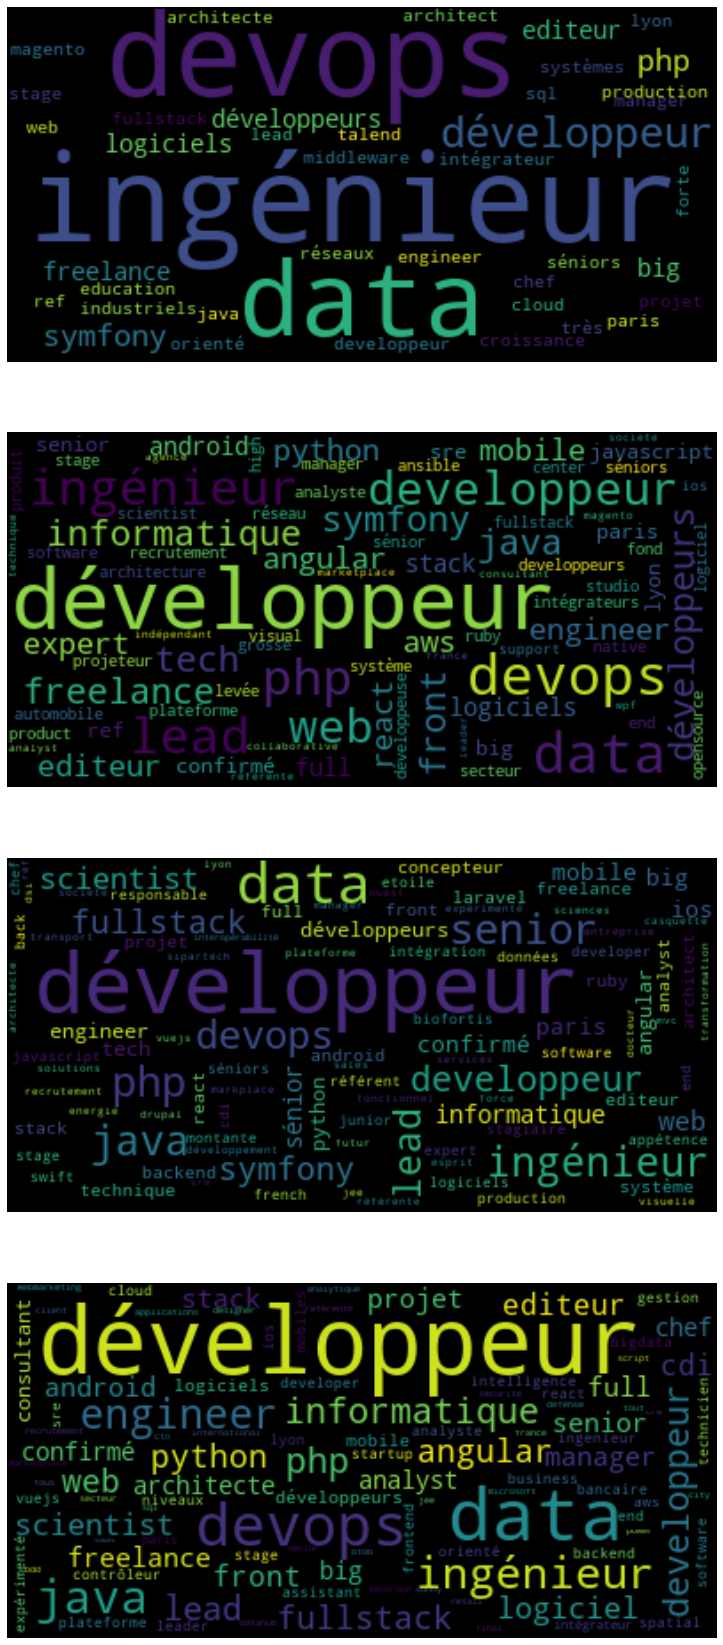

In [26]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize = (25, 30))

plt.figure(1)
plt.subplot(4, 1, 1)
plt.imshow(wordcloud_0, interpolation="bilinear")
plt.axis("off")

plt.subplot(4, 1, 2)
plt.imshow(wordcloud_1, interpolation="bilinear")
plt.axis("off")

plt.subplot(4, 1, 3)
plt.imshow(wordcloud_2, interpolation="bilinear")
plt.axis("off")

plt.subplot(4, 1, 4)
plt.imshow(wordcloud_3, interpolation="bilinear")
plt.axis("off")

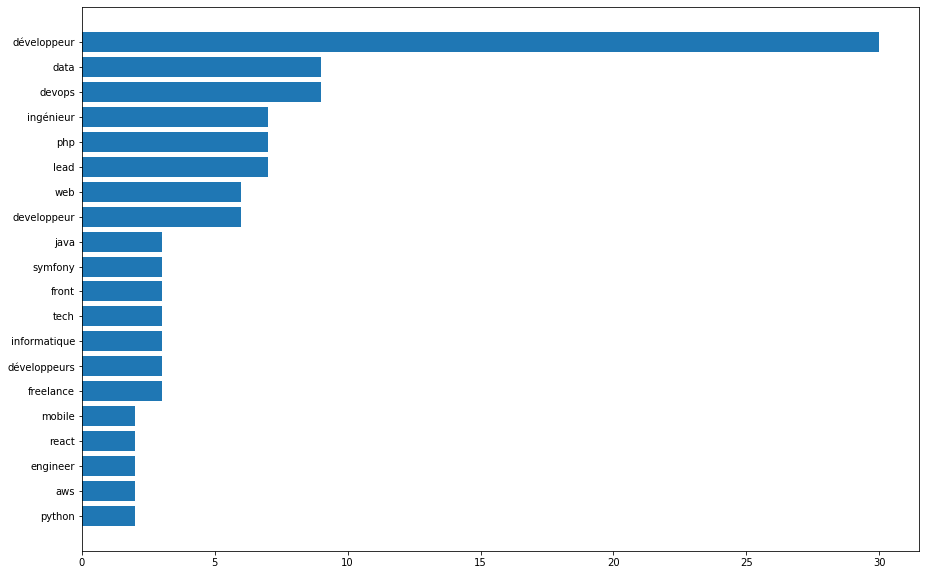

In [15]:
import matplotlib.pyplot as plt

count_title_1 = pd.DataFrame.from_dict(result_series_1, orient='index', columns = ["fréquence"]) [:20]
plt.figure(figsize=(15,10))
plt.barh(count_title_1.index, count_title_1["fréquence"])
plt.gca().invert_yaxis()  # labels read top-to-bottom
#plt.xticks(rotation=90)
#count_title_1.fréquence
plt.show()

In [16]:
def clean_summary(desc):
    desc = word_tokenize(desc)
    #desc = [word.lower() for word in desc if word.isalpha() and len(word)>2]
    desc = [word.lower() for word in desc if (word.isalpha() or word.isdigit()) and len(word)>1]
    desc = [word for word in desc if (word not in stop_words_en) and (word not in stop_words_fr)]
    return desc

In [17]:
#stopwords
stop_words_en = stopwords.words('english')
stop_words_fr = stopwords.words('french')

In [18]:
tag_desc_0 = label_1["Description"].apply(clean_summary)
tag_desc_1 = label_2["Description"].apply(clean_summary)    
tag_desc_2 = label_3["Description"].apply(clean_summary)
tag_desc_3 = label_4["Description"].apply(clean_summary)

In [19]:
desc_0 = tag_desc_0.apply(Counter).sum().items()
desc_0 = sorted(desc_0, key=lambda kv : kv[1], reverse=True) 
dict_desc_0 = {k: v for k,v in desc_0}


desc_1 = tag_desc_1.apply(Counter).sum().items()
desc_1 = sorted(desc_1, key=lambda kv : kv[1], reverse=True) 
dict_desc_1 = {k: v for k,v in desc_1}

desc_2 = tag_desc_2.apply(Counter).sum().items()
desc_2 = sorted(desc_2, key=lambda kv : kv[1], reverse=True) 
dict_desc_2 = {k: v for k,v in desc_2}

desc_3 = tag_desc_3.apply(Counter).sum().items()
desc_3 = sorted(desc_3, key=lambda kv : kv[1], reverse=True) 
dict_desc_3 = {k: v for k,v in desc_3}

(-0.5, 399.5, 199.5, -0.5)

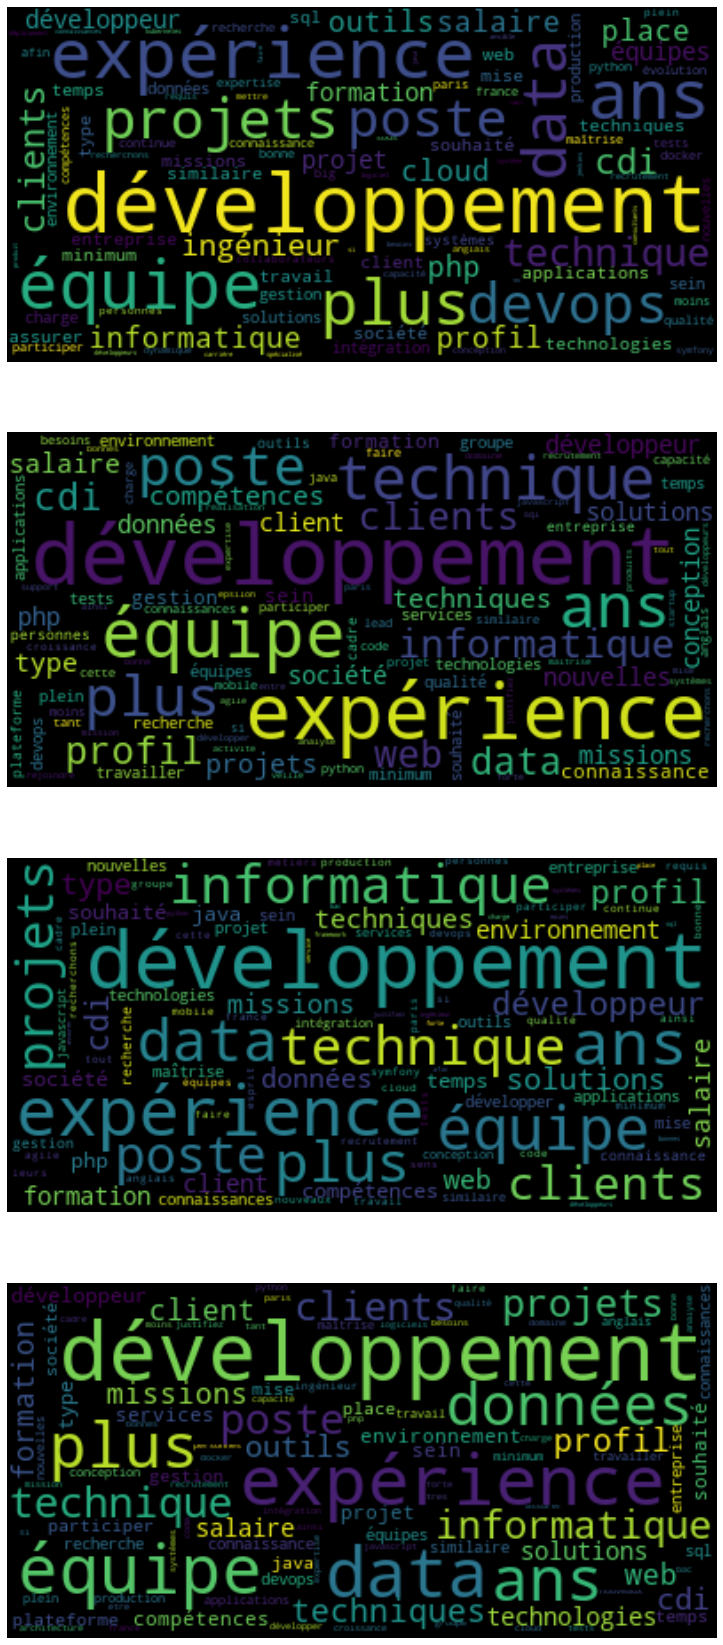

In [20]:
wordcloud5 = WordCloud(max_words=100).generate_from_frequencies(dict_desc_0)
wordcloud6 = WordCloud(max_words=100).generate_from_frequencies(dict_desc_1)
wordcloud7 = WordCloud(max_words=100).generate_from_frequencies(dict_desc_2)
wordcloud8 = WordCloud(max_words=100).generate_from_frequencies(dict_desc_3)

figure = plt.figure(figsize = (25, 30))
plt.figure(1)
plt.subplot(4, 1, 1)
plt.imshow(wordcloud5, interpolation="bilinear")
plt.axis("off")

plt.subplot(4, 1, 2)
plt.imshow(wordcloud6, interpolation="bilinear")
plt.axis("off")

plt.subplot(4, 1, 3)
plt.imshow(wordcloud7, interpolation="bilinear")
plt.axis("off")

plt.subplot(4, 1, 4)
plt.imshow(wordcloud8, interpolation="bilinear")
plt.axis("off")

In [21]:
series_desc_1 = pd.Series(dict_desc_1)
series_desc_2 = pd.Series(dict_desc_2)
series_desc_3 = pd.Series(dict_desc_3)

In [22]:
skills = ["python", "java", "sql", "php", "jquery", "docker", "r"]
skills2= ["junior", "confirmé", "senior", "lead", "chef"]

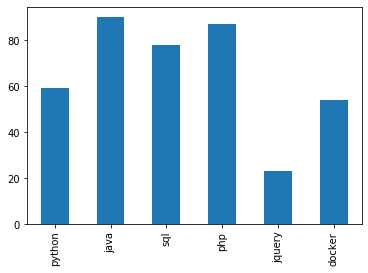

In [23]:
filter_series_1 = series_desc_1.filter(items=skills)
filter_series_2 = series_desc_2.filter(items=skills)
filter_series_3 = series_desc_3.filter(items=skills)
filter_series_1.plot.bar()
filter_series_2.plot.bar()
filter_series_3.plot.bar()

In [24]:
#(filter_series_1.values/label_1.shape[0]).apply(format('.2f'))


AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [25]:
x = np.arange(len(filter_series.index))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, filter_series_1.values/label_1.shape[0], width, label='Class 1')
rects2 = ax.bar(x, filter_series_2.values/label_2.shape[0], width, label='Class 2')
rects3 = ax.bar(x + width, filter_series_3.values/label_3.shape[0], width, label='Class 3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fréquence')
ax.set_title(' Frequence par compétence et classe')
ax.set_xticks(x)
ax.set_xticklabels(filter_series.index)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

NameError: name 'filter_series' is not defined

In [ ]:
print(label_1.shape)
print(label_2.shape)
print(label_3.shape)

In [ ]:
filter_series_1 = series_desc_1.filter(items=skills2)
filter_series_2 = series_desc_2.filter(items=skills2)
filter_series_3 = series_desc_3.filter(items=skills2)

In [ ]:
x = np.arange(len(filter_series_1.index))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, filter_series_1.values/label_1.shape[0], width, label='Class 1')
rects2 = ax.bar(x, filter_series_2.values/label_2.shape[0], width, label='Class 2')
rects3 = ax.bar(x + width, filter_series_3.values/label_3.shape[0], width, label='Class 3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fréquence')
ax.set_title(' Frequence par compétence et classe')
ax.set_xticks(x)
ax.set_xticklabels(filter_series_1.index)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
skills3= ["machine", "deep",]

In [ ]:
filter_series_1 = series_desc_1.filter(items=skills3)
filter_series_2 = series_desc_2.filter(items=skills3)
filter_series_3 = series_desc_3.filter(items=skills3)

In [ ]:
x = np.arange(len(filter_series_1.index))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, filter_series_1.values/label_1.shape[0], width, label='Class 1')
rects2 = ax.bar(x, filter_series_2.values/label_2.shape[0], width, label='Class 2')
rects3 = ax.bar(x + width, filter_series_3.values/label_3.shape[0], width, label='Class 3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Fréquence')
ax.set_title(' Frequence par compétence et classe')
ax.set_xticks(x)
ax.set_xticklabels(filter_series_1.index)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()